# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.7 MB/s eta 0:00:00
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080016 sha256=1549365348349dea5c5f851548a5a73353ebcb89fe3e42ea77b536f3d116aa11
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.3.4
    Uninstalling bokeh-3.3.4:
Traceback (most recent call last):
  File "/usr/lib/python3.10/shutil.py", line 816, in move
    os.rename(src, real_dst)
OSError: [Errno 18] Invalid cross-device link: '/usr/local/lib/python3.10/dist-packages/bokeh/' -> '/usr/local/lib/python3.10/dis

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "rowanamr"
kaggle_key = "714dc92412ff3f072b8bd00ed314fb17"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 81.8MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.5/427.5 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
from sklearn import datasets
import numpy as np
from datetime import datetime
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
#identifying the data types of the training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates = ['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
submission.describe()

,datetime,count
count,6493,6493.0
mean,2012-01-13 09:27:47.765285632,0.0
min,2011-01-20 00:00:00,0.0
25%,2011-07-22 15:00:00,0.0
50%,2012-01-20 23:00:00,0.0
75%,2012-07-20 17:00:00,0.0
max,2012-12-31 23:00:00,0.0
std,NaN,0.0


In [ ]:
print('Train Columns:', train.columns,"\nTest Columns:", test.columns)

Train Columns: Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object') 
Test Columns: Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(label = 'count', eval_metric='root_mean_squared_error',
                             learner_kwargs={'ignored_columns':['casual', 'registered']}).fit(train_data = train, time_limit = 600,presets = 'best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240506_170024"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240506_170024/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 202 seconds

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.100099  root_mean_squared_error      21.532727  414.256211                0.001172           0.055015            3       True         12
1   RandomForestMSE_BAG_L2  -53.379098  root_mean_squared_error      15.925156  306.057753                0.766162          51.687616            2       True         11
2          LightGBM_BAG_L2  -55.194798  root_mean_squared_error      15.570819  287.537108                0.411825          33.166972            2       True         10
3        LightGBMXT_BAG_L2  -60.334883  root_mean_squared_error      20.353568  329.346608                5.194573          74.976471            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.090107    0.057030   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.11692517585325,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble

### Create predictions from test dataset

In [ ]:
#Extracting leaderboard of models as a dataframe
leaderboard = pd.DataFrame(predictor.leaderboard(silent=True))
leaderboard

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-53.100099,root_mean_squared_error,21.532727,414.256211,0.001172,0.055015,3,True,12
1,RandomForestMSE_BAG_L2,-53.379098,root_mean_squared_error,15.925156,306.057753,0.766162,51.687616,2,True,11
2,LightGBM_BAG_L2,-55.194798,root_mean_squared_error,15.570819,287.537108,0.411825,33.166972,2,True,10
3,LightGBMXT_BAG_L2,-60.334883,root_mean_squared_error,20.353568,329.346608,5.194573,74.976471,2,True,9
4,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.090107,0.057030,0.090107,0.057030,1,True,2
5,WeightedEnsemble_L2,-84.125061,root_mean_squared_error,0.090941,0.088699,0.000834,0.031668,2,True,8
6,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.098558,0.087750,0.098558,0.087750,1,True,1
7,RandomForestMSE_BAG_L1,-116.548359,root_mean_squared_error,0.612197,20.038967,0.612197,20.038967,1,True,5
8,ExtraTreesMSE_BAG_L1,-124.600676,root_mean_squared_error,0.593121,10.870973,0.593121,10.870973,1,True,7
9,LightGBM_BAG_L1,-131.054162,root_mean_squared_error,2.284852,38.025937,2.284852,38.025937,1,True,4


<ipython-input-165-253476883072>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data = leaderboard, x ='model', y = 'score_val', palette = 'viridis');


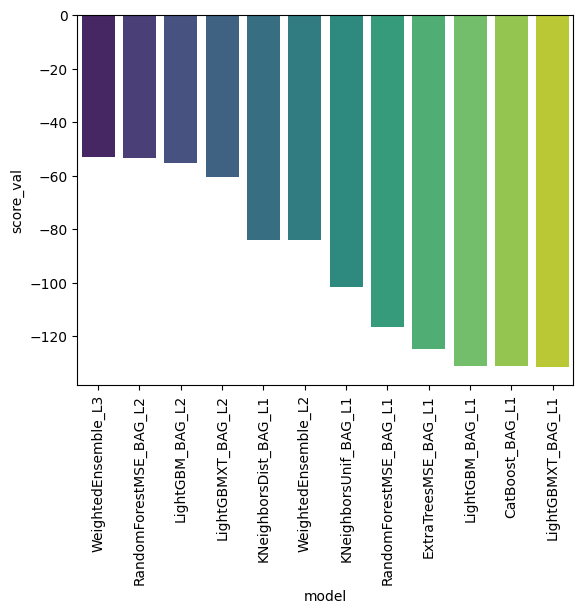

In [ ]:
sb.barplot(data = leaderboard, x ='model', y = 'score_val', palette = 'viridis');
plt.xticks(rotation = 90);

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    22.692410
1    42.642490
2    46.066166
3    48.878876
4    52.019318
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.795296
std        90.149475
min         2.894301
25%        19.917858
50%        63.978477
75%       168.628143
max       368.089172
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
predictions[predictions<0].count()

0

In [ ]:
# Set them to zero: NO need cause  we have no negative values

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = pd.DataFrame(predictions)
submission.to_csv("submission.csv", index=False)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,22.692410
1,2011-01-20 01:00:00,42.642490
2,2011-01-20 02:00:00,46.066166
3,2011-01-20 03:00:00,48.878876
4,2011-01-20 04:00:00,52.019318


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 259kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-05-06 18:26:30  first raw submission  complete  1.80464      1.80464       


 #### Initial score of 1.80464


## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

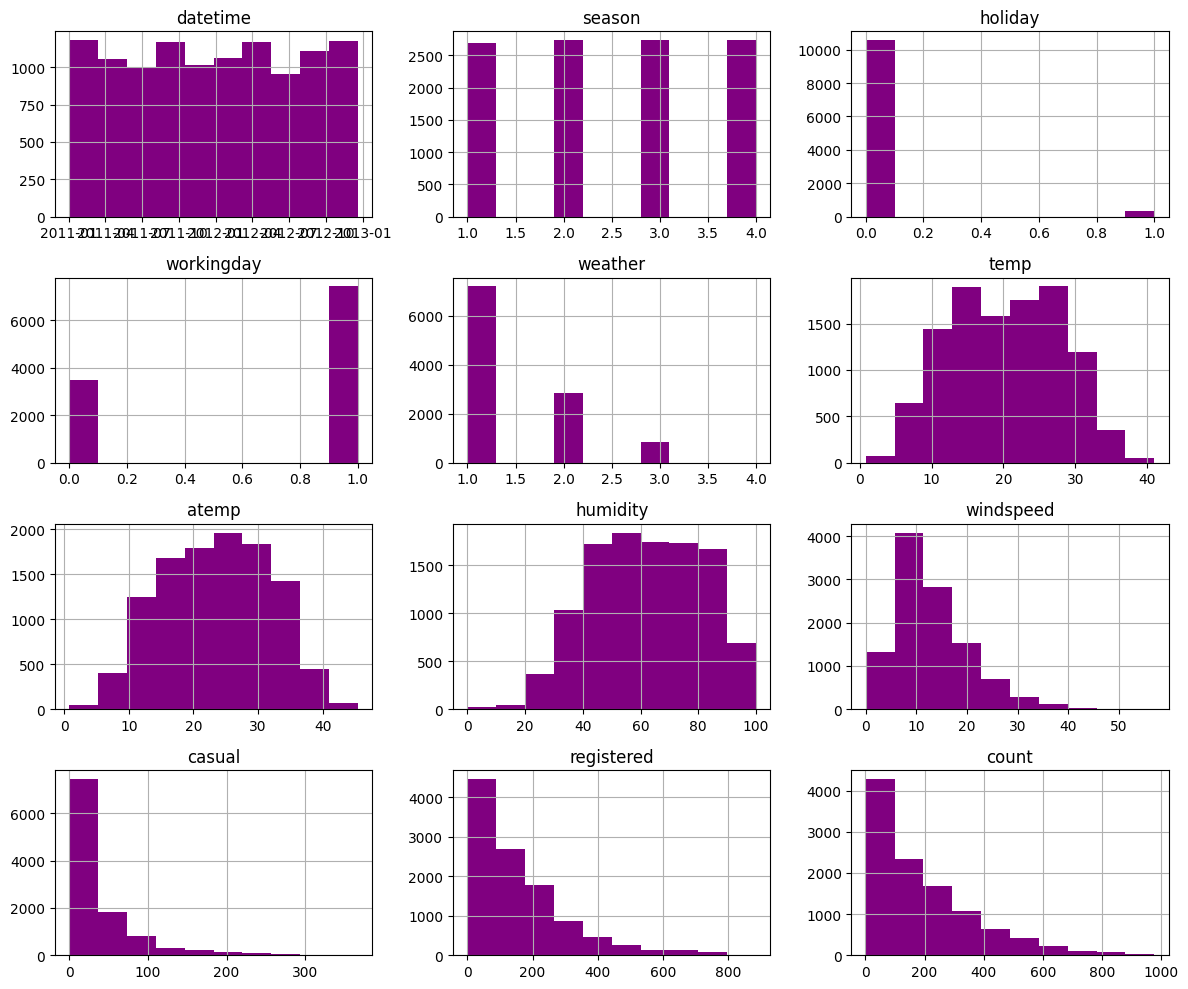

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize = (12,10), color = 'purple');
plt.tight_layout();
plt.xticks(fontsize=10);

In [ ]:
# create a new feature
train['month'] = train['datetime'].dt.month
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'] .dt.day

<ipython-input-118-b1baffbff53f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(data = train, x = 'hour', y = 'count',kind = 'bar', palette = 'viridis')


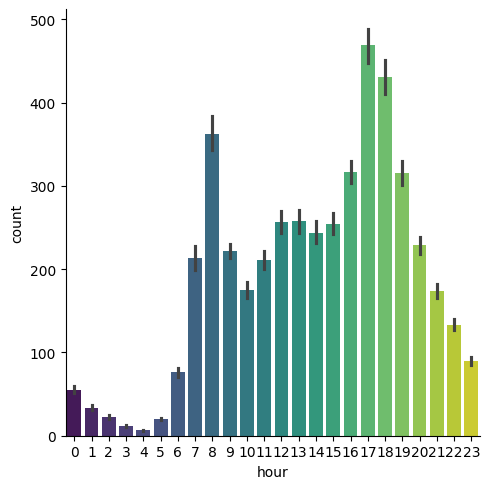

In [ ]:
#differentiating the count per hour for the bike
sb.catplot(data = train, x = 'hour', y = 'count',kind = 'bar', palette = 'viridis')

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')
test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4


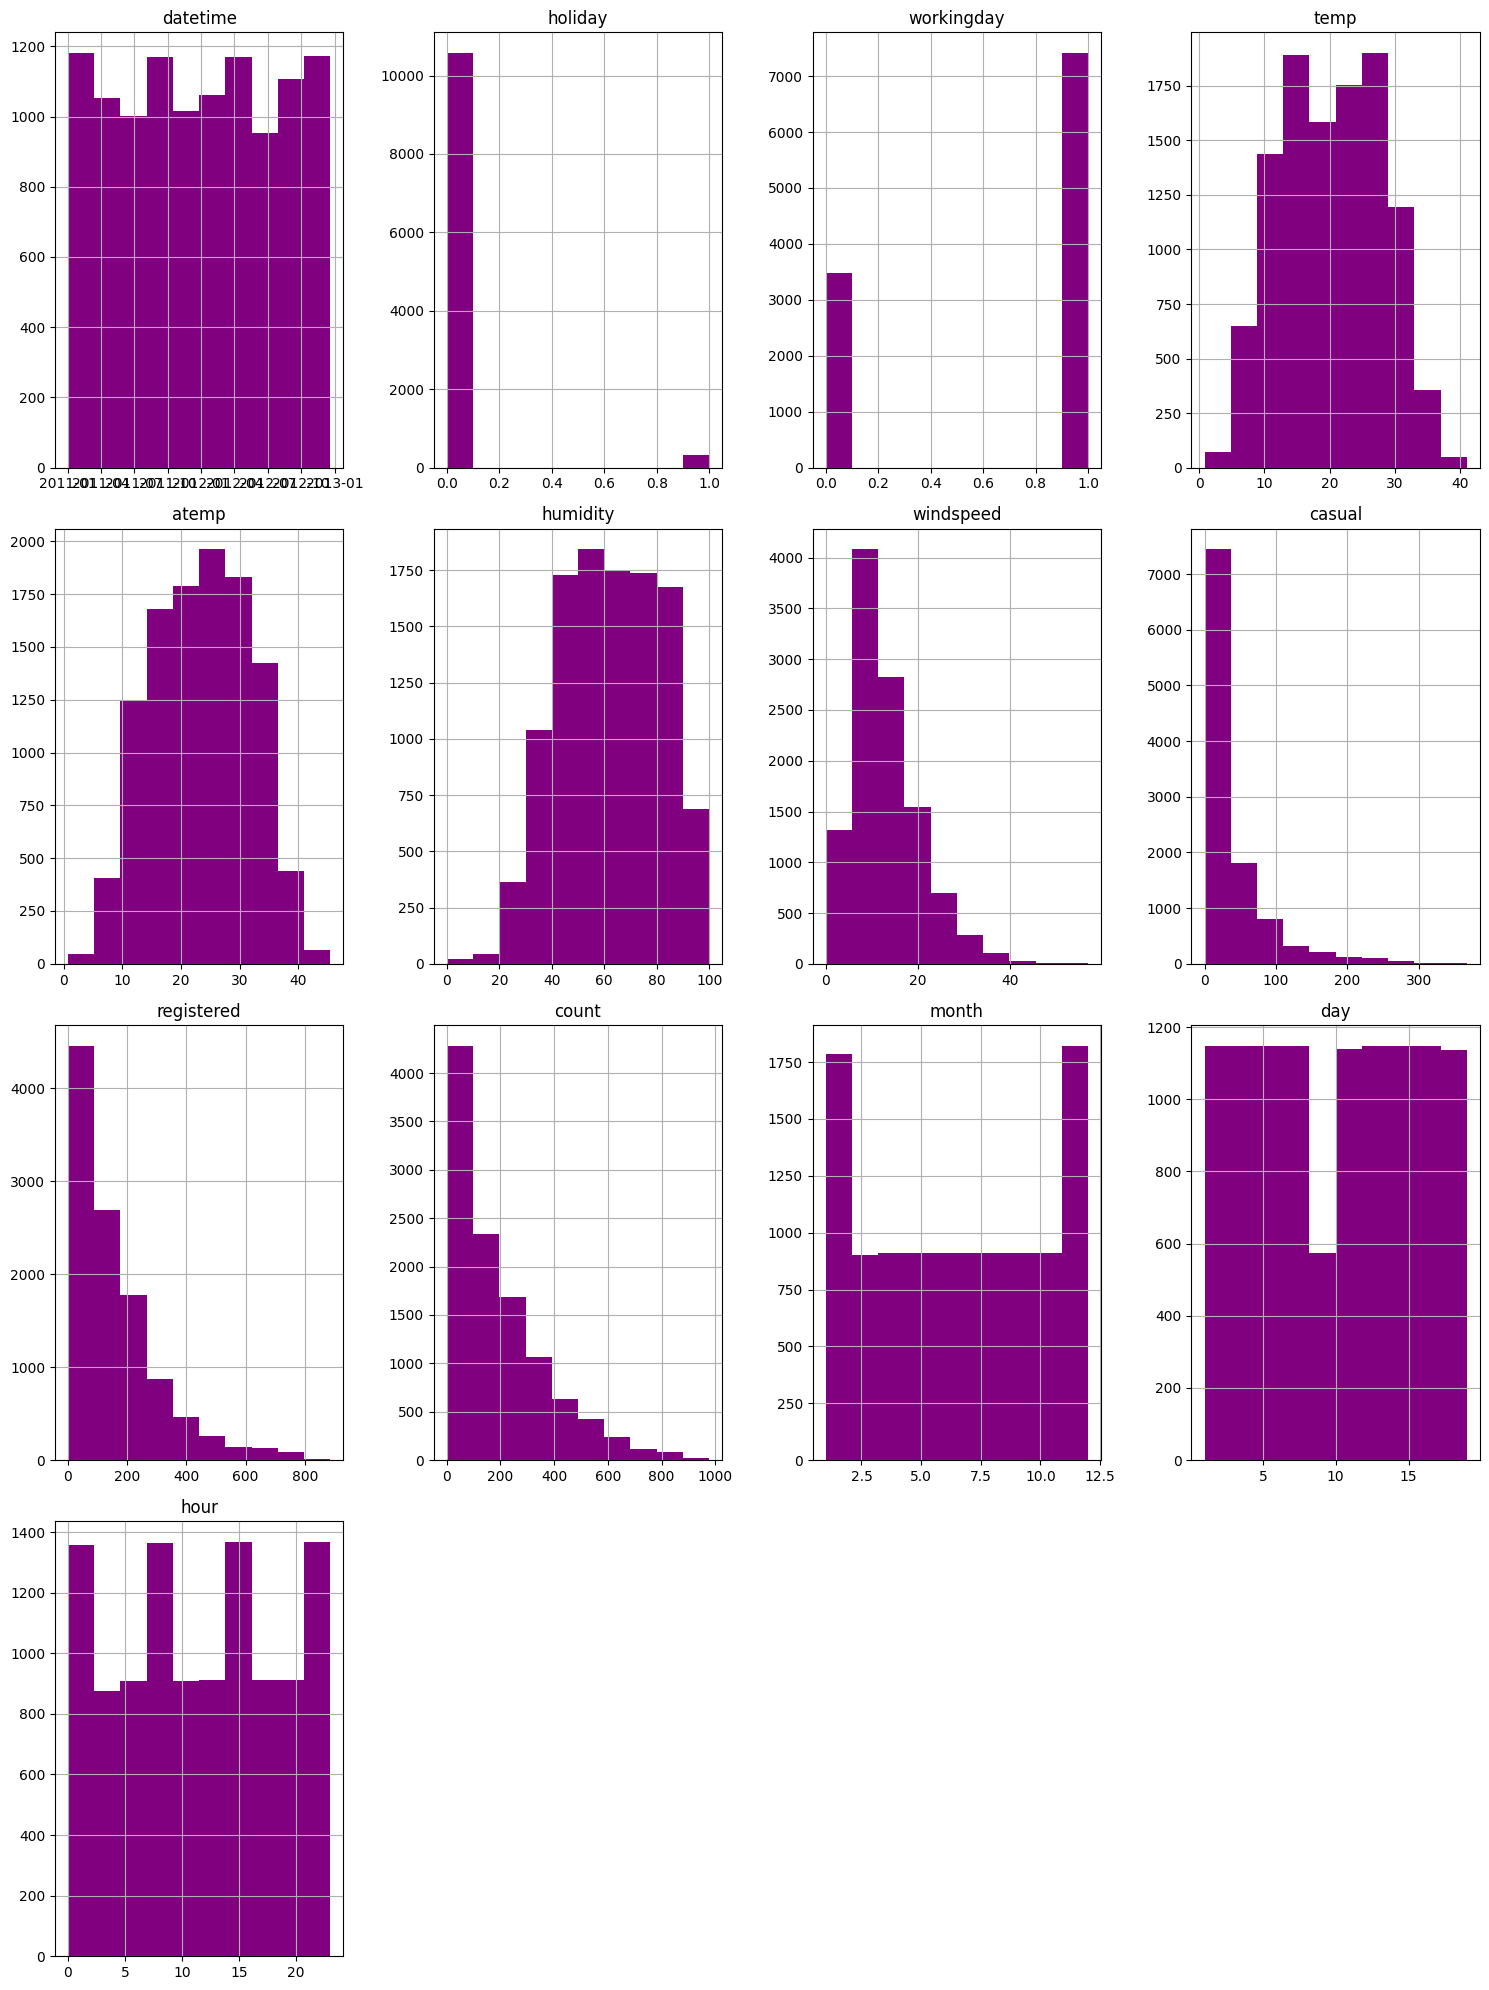

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize = (15,20),color = 'purple');
plt.tight_layout()


## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
#Using XGBOOST as the algorithm
predictor_new_features = TabularPredictor(label = 'count', eval_metric = 'root_mean_squared_error',
                                          learner_kwargs = {'ignored_columns':['casual', 'registered']}).fit(train_data = train, time_limit = 600, presets = 'best_quality',hyperparameters = {'XGB':{'learning_rate':0.1}})

No path specified. Models will be saved in: "AutogluonModels/ag-20240506_212740"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240506_212740/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 104 seconds

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -34.535170  root_mean_squared_error       3.998041  88.480782                0.001126           0.023480            3       True          4
1       XGBoost_BAG_L1 -34.602563  root_mean_squared_error       3.665381  62.813035                3.665381          62.813035            1       True          1
2  WeightedEnsemble_L2 -34.602563  root_mean_squared_error       3.666289  62.818079                0.000908           0.005044            2       True          2
3       XGBoost_BAG_L2 -35.811320  root_mean_squared_error       3.996915  88.457302                0.331534          25.644267            2       True          3
Number of models trained: 4
Types of models trained:
{'WeightedEnsembleModel', 'StackerEnsembleModel_XGBoost'}
Bagging used

{'model_types': {'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'XGBoost_BAG_L1': -34.602562989830695,
  'WeightedEnsemble_L2': -34.602562989830695,
  'XGBoost_BAG_L2': -35.811320209358335,
  'WeightedEnsemble_L3': -34.535169798883196},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'XGBoost_BAG_L1': ['XGBoost_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'XGBoost_BAG_L2': ['XGBoost_BAG_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'XGBoost_BAG_L1': 62.813035011291504,
  'WeightedEnsemble_L2': 0.005043983459472656,
  'XGBoost_BAG_L2': 25.644267320632935,
  'WeightedEnsemble_L3': 0.023479938507080078},
 'model_pred_times': {'XGBoost_BAG_L1': 3.6653809547424316,
  'WeightedEnsemble_L2': 0.0009083747863769531,
  'XGBoost_BAG_L2': 0.33153414726257324,
  'Weig

In [ ]:
leaderboard_new = pd.DataFrame(predictor_new_features.leaderboard(silent=True))

<ipython-input-137-786abaf1dc1a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data = leaderboard_new, x = 'model', y = 'score_val', palette = 'viridis');


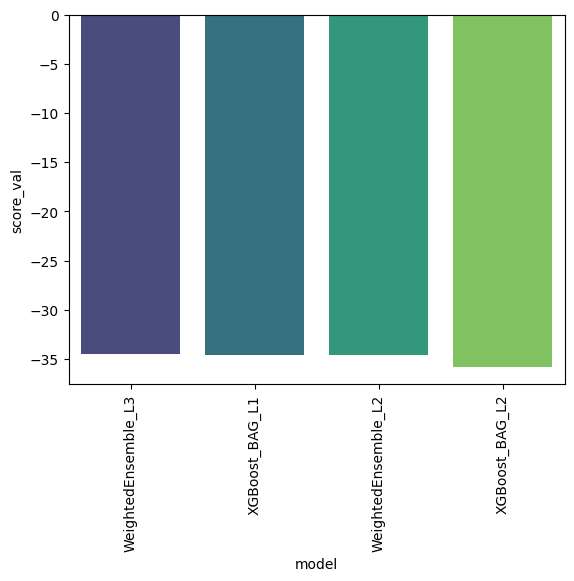

In [ ]:
plt.xticks(rotation = 90);
sb.barplot(data = leaderboard_new, x = 'model', y = 'score_val', palette = 'viridis');


In [ ]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    17.022753
1     2.670456
2     1.015939
3     2.038328
4     1.995123
Name: count, dtype: float32

In [ ]:
predictions_new_features.describe()

count    6493.000000
mean      191.759201
std       173.891647
min       -25.108835
25%        46.389473
50%       150.952454
75%       284.985748
max       908.491333
Name: count, dtype: float64

In [ ]:
# Remember to set all negative values to zero
predictions_new_features [predictions_new_features < 0].count()

126

In [ ]:
#Setting all -ve values to zero
for a,b in enumerate(predictions_new_features):
    if b < 0:
        predictions_new_features[a] = 0


In [ ]:
predictions_new_features [predictions_new_features < 0].count()

0

In [ ]:
# extracting column names
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'month', 'day', 'hour'],
      dtype='object')

In [ ]:
# Same submitting predictions
submission_new_features['count']= predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)
submission_new_features.head()


,datetime,count
0,2011-01-20 00:00:00,17.022753
1,2011-01-20 01:00:00,2.670456
2,2011-01-20 02:00:00,1.015939
3,2011-01-20 03:00:00,2.038328
4,2011-01-20 04:00:00,1.995123


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/kaggle/cli.py", line 54, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 806, in competition_submit_cli
    submit_result = self.competition_submit(file_name, message,
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 757, in competition_submit
    content_length=os.path.getsize(file_name),
  File "/usr/lib/python3.10/genericpath.py", line 50, in getsize
    return os.stat(filename).st_size
FileNotFoundError: [Errno 2] No such file or directory: 'submission_new_features.csv'


In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-05-06 18:26:30  first raw submission  complete  1.80464      1.80464       


#### New Score of 1.80464

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
predictor_new_hpo = TabularPredictor(label = 'count', eval_metric='root_mean_squared_error',
                                     learner_kwargs = {'ignored_columns': ['casual','registered']}).fit(train_data = train,
                                                                                                        presets = 'optimize_for_deployment',hyperparameters = {'GBM':[{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},'GBMLarge']}, refit_full='best',
                                                                                                        hyperparameter_tune_kwargs={'num_trials': 100,
                                                                                                        'search_strategy': 'random','scheduler':'local'})

No path specified. Models will be saved in: "AutogluonModels/ag-20240506_224350"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240506_224350"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:       9.33 GB / 12.67 GB (73.6%)
Disk Space Avail:   72.72 GB / 107.72 GB (67.5%)
Train Data Rows:    10886
Train Data Columns: 14
Label Column:       count
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify pro

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBMLarge -35.197006  root_mean_squared_error       0.188926  6.752932                0.188926           6.752932            1       True          1
1  WeightedEnsemble_L2 -35.197006  root_mean_squared_error       0.189668  6.757520                0.000742           0.004588            2       True          2
Number of models trained: 2
Types of models trained:
{'LGBModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])             : 2 | ['season', 'weather']
('float', [])                : 3 | ['temp', 'atemp', 'windspeed']
('int', [])                  : 4 | ['humidity', 'month', 'day', 'hour']
('int', ['bool'])            : 2 | ['holiday

{'model_types': {'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMLarge': -35.1970063198199,
  'WeightedEnsemble_L2': -35.1970063198199},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBMLarge': ['LightGBMLarge'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBMLarge': 6.752931833267212,
  'WeightedEnsemble_L2': 0.004587888717651367},
 'model_pred_times': {'LightGBMLarge': 0.18892598152160645,
  'WeightedEnsemble_L2': 0.0007419586181640625},
 'num_bag_folds': 0,
 'max_stack_level': 2,
 'model_hyperparams': {'LightGBMLarge': {'learning_rate': 0.03,
   'num_leaves': 128,
   'feature_fraction': 0.9,
   'min_data_in_leaf': 5},
  'WeightedEnsemble_L2': {'use_orig_features': False,
   'max_base_models': 25,
   'max_base_models_per_type': 5,
   'save_bag_folds': True}},
 'leaderboard':                  model  score_val              eval_metric  pred_time_val  \
 0        LightGBMLarg

In [ ]:
# Leaderboard dataframe
leaderboard_new_hpo = pd.DataFrame(predictor_new_hpo.leaderboard(silent=True))
leaderboard_new_hpo

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge,-35.197006,root_mean_squared_error,0.188926,6.752932,0.188926,6.752932,1,True,1
1,WeightedEnsemble_L2,-35.197006,root_mean_squared_error,0.189668,6.757520,0.000742,0.004588,2,True,2


<ipython-input-166-a098bc2b9bd6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data = leaderboard_new_hpo, x ='model', y = 'score_val', palette = 'viridis');


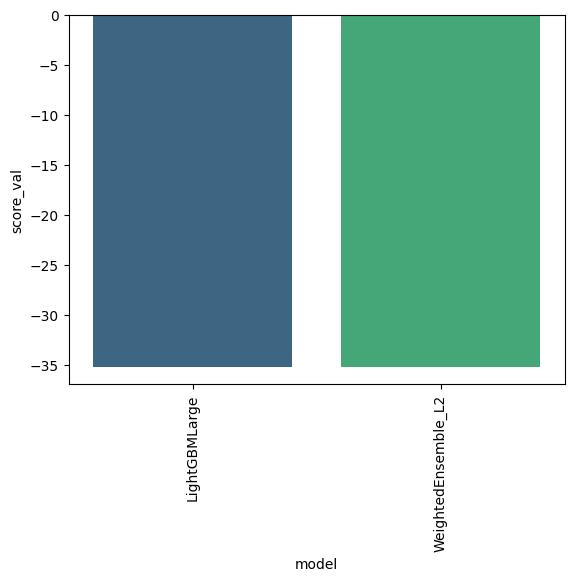

In [ ]:
sb.barplot(data = leaderboard_new_hpo, x ='model', y = 'score_val', palette = 'viridis');
plt.xticks(rotation = 90);

In [ ]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    16.495846
1     3.768779
2    -1.335164
3     0.692885
4     0.664847
Name: count, dtype: float32

In [ ]:
predictions_new_hpo.describe()

count    6493.000000
mean      195.222626
std       174.827057
min        -5.338238
25%        48.492664
50%       153.770294
75%       289.827179
max       896.964050
Name: count, dtype: float64

In [ ]:
predictions_new_hpo[predictions_new_hpo<0].count()

0

In [ ]:
# Remember to set all negative values to zero
for a,b in enumerate(predictions_new_hpo):
    if b < 0:
        predictions_new_hpo[a] = 0


In [ ]:
predictions_new_hpo[predictions_new_hpo<0].count()


In [ ]:
# Same submitting predictions
submission_new_hpo['count'] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)
submission_new_hpo.head()

NameError: name 'submission_new_hpo' is not defined

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [?, ?, ?],
    "hpo2": [?, ?, ?],
    "hpo3": [?, ?, ?],
    "score": [?, ?, ?]
})